## <span style="color:#008abc"><b>Lead Scoring -Case study:</b></span>

<span style="color:#008abc"><b>Problem Statement</b></span>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. Now, although X Education gets a lot of leads, its lead conversion rate is very poor.

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<span style="color:#008abc"><b>Business Goal</b></span>

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## <span style="color:#008abc"><b> Data Preparation</b></span>

In [89]:
# Import the required libraries

# Analysis and computation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,8),
         'axes.labelsize': 'x-large',
         'axes.labelcolor': '#008abc',
         'axes.titlesize':'20',
         'text.color':'green',
         'axes.titlepad': 35,
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Autocomplete in cell
%config IPCompleter.greedy=True

> ### <span style="color:#008abc">Read the data</span>

In [90]:
leads_df = pd.read_csv('leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


> ### <span style="color:#008abc">Inspect the data</span>

In [91]:
leads_df.shape

(9240, 37)

In [92]:
## Check duplicates - Check if the unique ID assigned to a customer is repeated
leads_df['Prospect ID'].nunique()

9240

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> No duplicate values found</span>
</div>

In [93]:
## Basic info about the data
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> We find many columns with missing values. Let's further check on the percenatge of values that are missing. <b>Also it is mentioned that many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.</b><br>This might be because the categorical variables were shown in a drop down, and select is shown as default. Hence, if no selection was made, then the value of Select can be equated to NULL.
</span>
</div>

___

## <font color='#008abc'>Data Cleaning</font> 

In [94]:
## Replace Select with NaN
leads_df = leads_df.replace('Select',np.nan)

## Find Percentage of NULL values
mis_val_percent = round((100 * leads_df.isnull().sum() / len(leads_df)),2)

## Fetch columns where percentage of missing records is greater than 0
mis_cols=mis_val_percent.loc[(mis_val_percent>0)].sort_values(ascending=False)
mis_cols

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        There are few columns that do not contain close to 50% of the data. We will remove those columns as imputing them with values might introduce bias in the dataset.
    </span>
    </div>

In [95]:
## Droppig columns with grater tha 45% data is missing
leads_df.drop(mis_cols[mis_cols>45].index,inplace=True,axis=1)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

> ### <span style="color:#008abc">Handle missing values </span>

In [96]:
## Fetch column containing less than 45% of missing values
mis_cols[mis_cols<45]

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

> Let's analyze the above columns to check if the column/rows needs to be retained and decide on the imputation to be performed.

> #### <font color='#008abc'>Categorical variables</font>

In [97]:
## Analyzing the string datatypes
str_cols=['City', 'Specialization', 'Tags','What matters most to you in choosing a course','What is your current occupation', 'Country', 'Last Activity', 'Lead Source']
## Identify the top values and it's frequency
leads_df[str_cols].describe()

,City,Specialization,Tags,What matters most to you in choosing a course,What is your current occupation,Country,Last Activity,Lead Source
count,5571,5860,5887,6531,6550,6779,9137,9204
unique,6,18,26,3,6,38,17,21
top,Mumbai,Finance Management,Will revert after reading the email,Better Career Prospects,Unemployed,India,Email Opened,Google
freq,3222,976,2072,6528,5600,6492,3437,2868


In [98]:
## Function to plot the data and print the top value % contribution
def check_col(col):
    from IPython.display import display, HTML
    sns.countplot(leads_df[col])
    plt.title(col +": Percentage of missing value:"+str(mis_cols[col])+"%")
    plt.xticks(rotation='vertical')
    plt.show()
    text='''The top value is <b>%s</b> and it makes up for <b>%s</b> amount of the data'''%(leads_df[col].value_counts().idxmax(),round((leads_df[col].value_counts().max()/leads_df[col].count()*100),2))
    data=HTML('''<div class="alert alert-block alert-info"><span style="color:black">'''+text+'''</span></div>''')
    display(data)

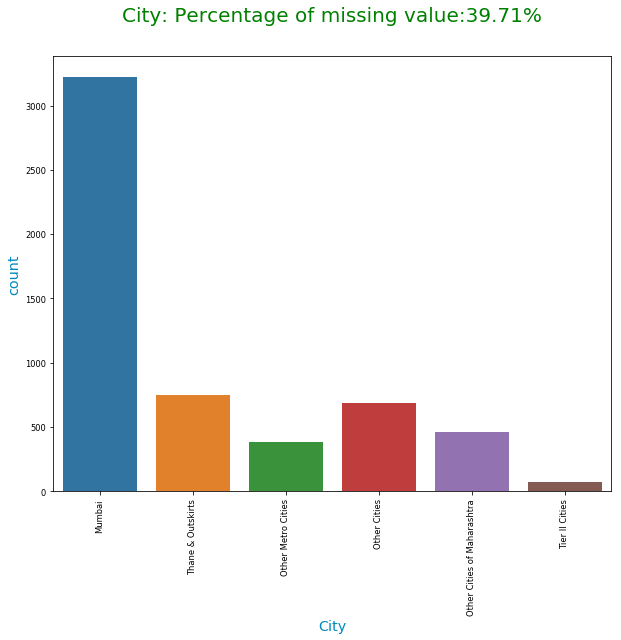

In [99]:
check_col(str_cols[0])

In [100]:
## As Mumbai has a significant contribution to the data, let's replace the Nan's with Mumbai.
leads_df['City']=leads_df['City'].replace(np.nan,'Mumbai')

___

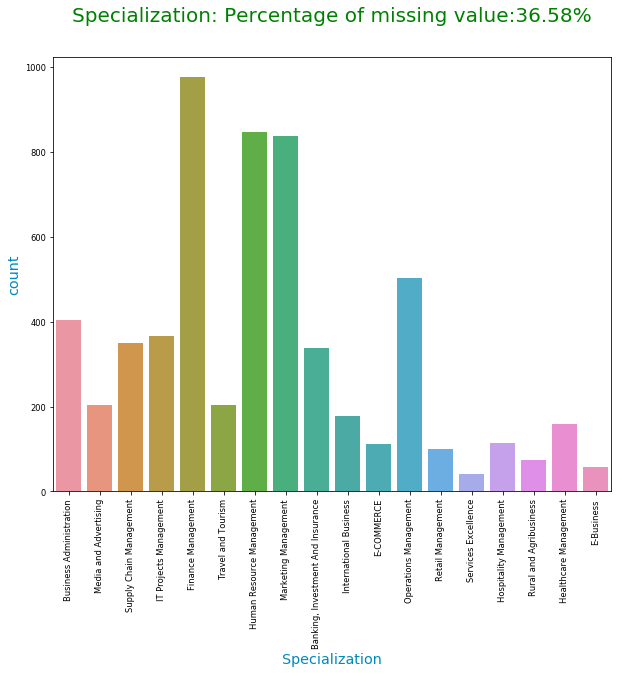

In [101]:
check_col(str_cols[1])

In [102]:
## The cases where specialization is NULL, might be because the field of specialization is not present 
## or they might be students or unemployed people
leads_df['Specialization']=leads_df['Specialization'].replace(np.nan,'Others')

___

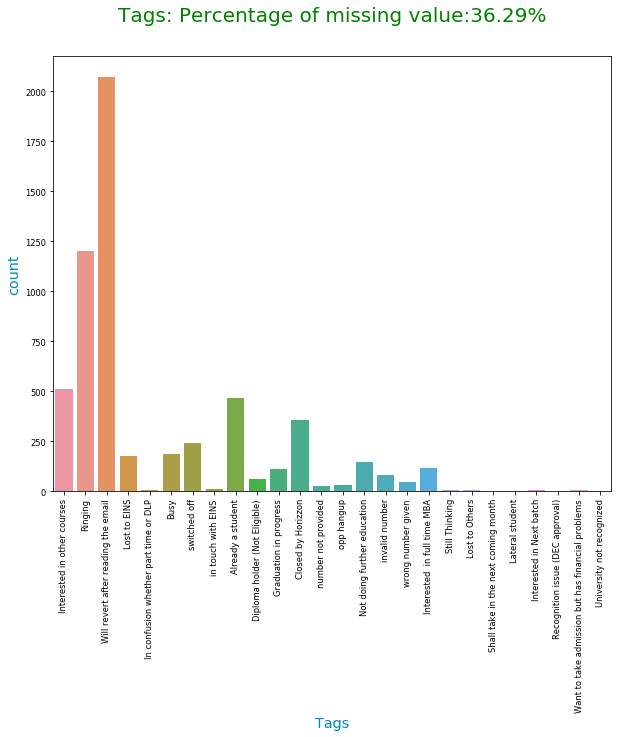

In [103]:
check_col(str_cols[2])

In [104]:
## As the top contributor is Will revert after reading the email we will replace the missing value with it
leads_df['Tags']=leads_df['Tags'].replace(np.nan,'Will revert after reading the email')

___

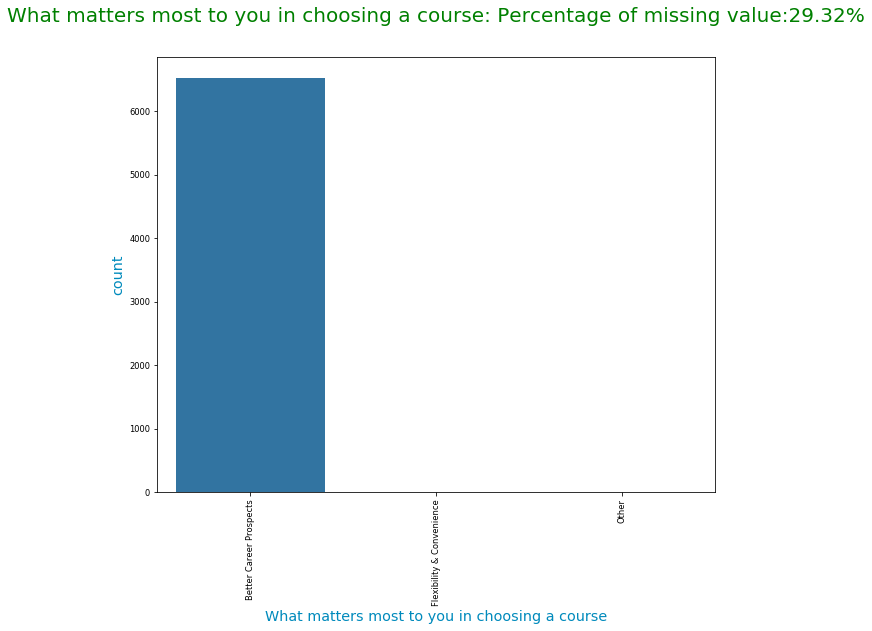

In [105]:
check_col(str_cols[3])

In [106]:
## As the evident top contributor, we will replace the missing values with Better Career Prospects
leads_df['What matters most to you in choosing a course']=leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

___

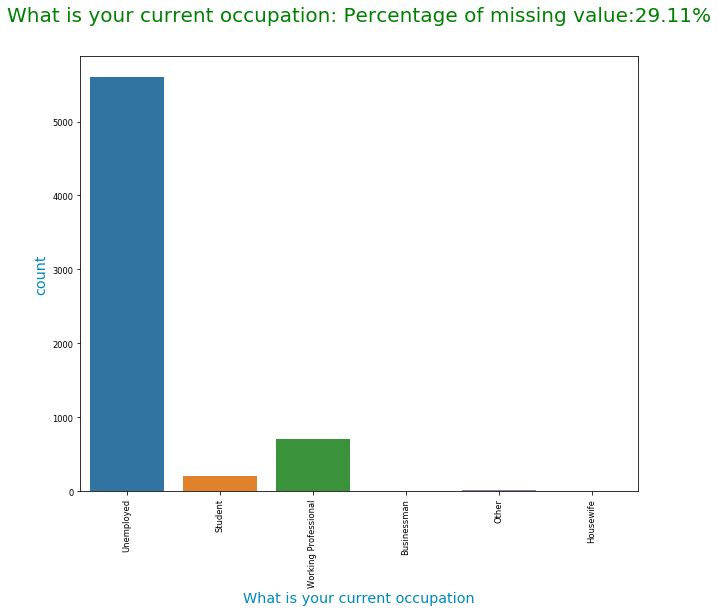

In [107]:
check_col(str_cols[4])

In [108]:
## We will replace the missing values with the evident contributor - Unemployed
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(np.nan,'Unemployed')

___

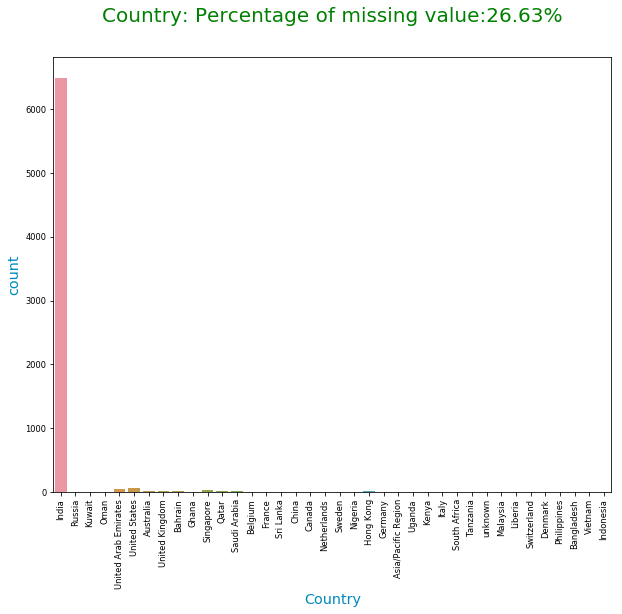

In [109]:
check_col(str_cols[5])

In [110]:
## Let's replace the missing values with India
leads_df['Country']=leads_df['Country'].replace(np.nan,'India')

___

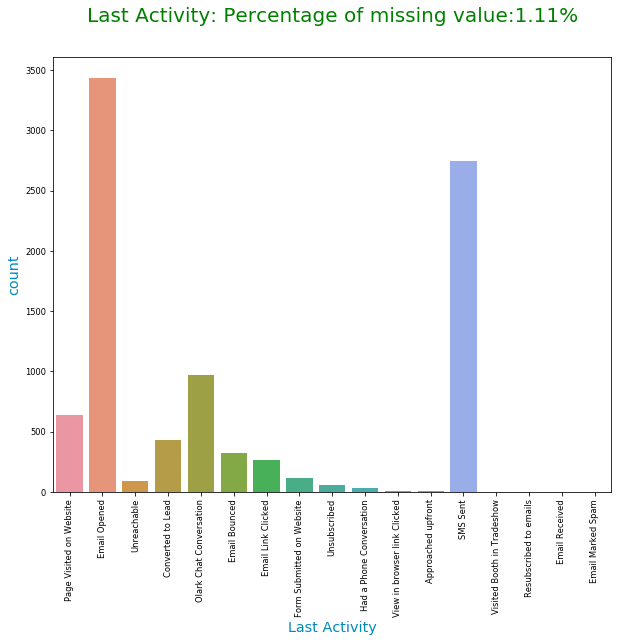

In [111]:
check_col(str_cols[6])

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> We will drop the rows where the <b>percenatge of missing value is less than 2 %.</b>
    </span>
    </div>



In [112]:
## The remaining records are those where Null values are not imputed (i.e) less than 2% NULL values. We will drop them
leads_df.dropna(inplace=True)
## Recompute the missing values to check if we have handled all cases
mis_val_percent = round((100 * leads_df.isnull().sum() / len(leads_df)),2)
mis_val_percent

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> We find that all the missing values are handled. Now let's perform EDA on the dataset.</span>
</div>

___

## <span style="color:#008abc">Analyze the dataset :EDA</span>

In [113]:
## Function to check how many subset of data has been converted for each category
def conversion_rate(col):

    total = leads_df[col]
    conv = leads_df[leads_df['Converted']==1][col]
    c_count = conv.value_counts()
    t_count = total.value_counts()

    for i in c_count.index:
        for j in t_count.index:
            if (i==j):
                cp = round((c_count[i]/t_count[i])*100,2)
                print(i,cp)
                



In [114]:
## Function to plot the data to perform univariate analysis
def var_ana(col):
    plt.figure(figsize = (8,4))
#     plt.subplot(1,2,1)
    sns.countplot(x = col, hue = "Converted", data = leads_df, order = leads_df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation='vertical')
    plt.show()
    conversion_rate(col)

> #### <font color='#008abc'>Categorical variables</font>

In [115]:
## Fetch string datatypes
categorical_col = leads_df.select_dtypes('object').nunique()
## Fetch columns having more than 2 categories
leads_df[categorical_col[categorical_col>3].index].describe()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Country,Specialization,What is your current occupation,Tags,City,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,9074,4,21,17,38,19,6,26,6,16
top,1dc50438-362b-4abd-8604-cb58d54e1148,Landing Page Submission,Google,Email Opened,India,Others,Unemployed,Will revert after reading the email,Mumbai,Modified
freq,1,4885,2868,3432,8787,3282,8159,5343,6752,3267


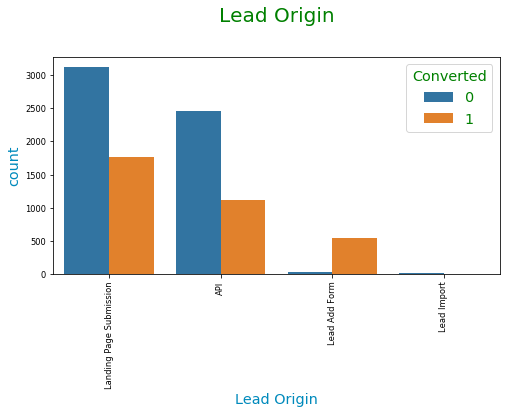

Landing Page Submission 36.17
API 31.16
Lead Add Form 93.63
Lead Import 30.0


In [116]:
var_ana('Lead Origin')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
        <li>Lead Add Form has a conversion rate of 93%, but the lead count is very limited </li>
        <li>Landing Page Submission and API have close to 30% of conversion rate with considerable count of leads</li>
        </ul>
        We should focus more on generating leads from <b>Lead Add Form</b> and improve the conversion rate of <b>Landing Page Submission</b> and <b>API</b>
    </span>
</div>

___

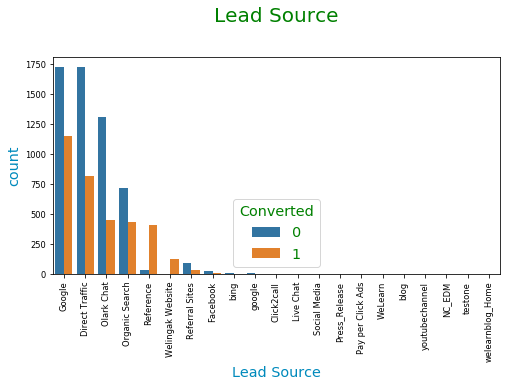

Google 39.99
Direct Traffic 32.17
Olark Chat 25.56
Organic Search 37.78
Reference 92.55
Welingak Website 98.45
Referral Sites 24.8
Facebook 29.03
Click2call 75.0
Live Chat 100.0
bing 16.67
NC_EDM 100.0
Social Media 50.0
WeLearn 100.0


In [117]:
var_ana('Lead Source')

In [118]:
## Perform spelling checks and group least sites
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google', 'Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call', 'Press_Release','Live Chat','Social Media',
                              'WeLearn','welearnblog_Home','testone','youtubechannel','NC_EDM', 'blog','Pay per Click Ads'],
                              'Other_sites')

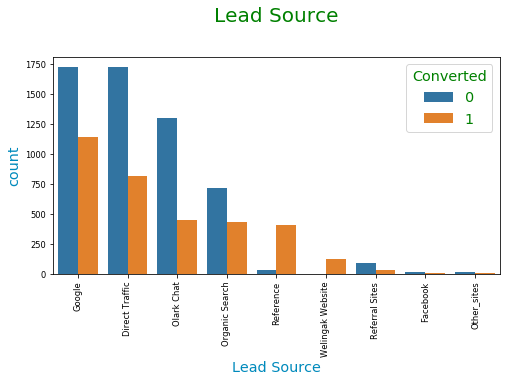

Google 39.92
Direct Traffic 32.17
Olark Chat 25.56
Organic Search 37.78
Reference 92.55
Welingak Website 98.45
Referral Sites 24.8
Facebook 29.03
Other_sites 39.13


In [119]:
## Recheck the variables
var_ana('Lead Source')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li><b>Welingak Website</b> has a conversion rate of 93%, but the lead count is limited </li>
            <li>Google and Organic Search have 35-40% conversion rate with considerable count of leads</li>
        </ul>
        We should focus more on generating leads from <b>Welingak Website & Reference</b> and improve the conversion rate of <b>Google, Olark Chat,Direct Traffic</b> and <b>Organic Search</b>
    </span>
</div>

___

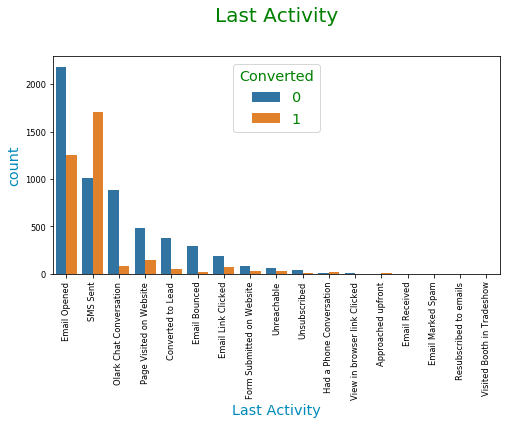

SMS Sent 62.78
Email Opened 36.42
Page Visited on Website 23.59
Olark Chat Conversation 8.64
Email Link Clicked 27.34
Converted to Lead 12.62
Unreachable 32.22
Form Submitted on Website 24.14
Had a Phone Conversation 80.0
Email Bounced 5.13
Unsubscribed 23.73
Approached upfront 100.0
Email Marked Spam 100.0
Email Received 100.0
Resubscribed to emails 100.0
View in browser link Clicked 16.67


In [120]:
var_ana('Last Activity')

In [121]:
leads_df['Last Activity']=leads_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                               'Approached upfront','Email Received', 'Email Marked Spam',
                               'Resubscribed to emails','Visited Booth in Tradeshow'], 'Other Actions')

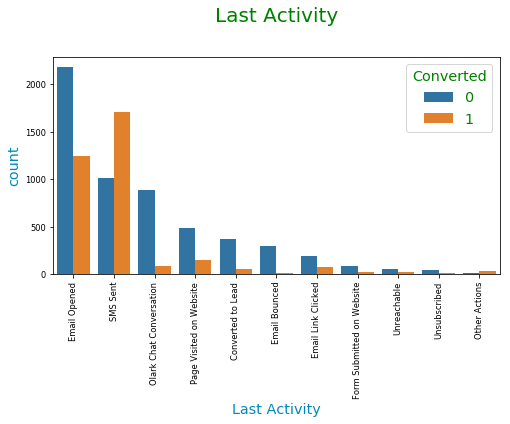

SMS Sent 62.78
Email Opened 36.42
Page Visited on Website 23.59
Olark Chat Conversation 8.64
Email Link Clicked 27.34
Converted to Lead 12.62
Other Actions 73.81
Unreachable 32.22
Form Submitted on Website 24.14
Email Bounced 5.13
Unsubscribed 23.73


In [122]:
## Recheck variable
var_ana('Last Activity')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li><b>SMS Sent</b> has a conversion rate of 63%, with considerable lead count. </li>
            <li>Email Opened has 36% conversion rate with a large count of leads</li>
        </ul>
        We should focus more on improving the conversion rate of <b>SMS & Email Clicked and Opened</b>
    </span>
</div>

___

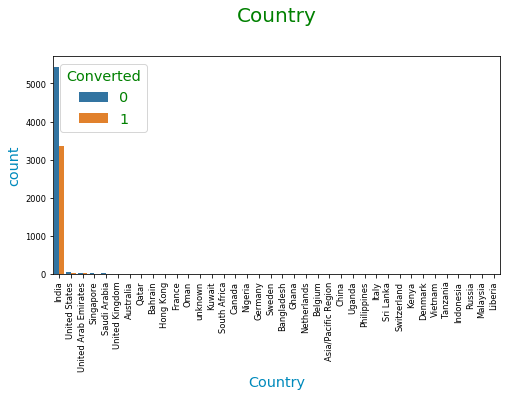

India 38.14
United Arab Emirates 37.74
United States 26.09
Singapore 45.83
United Kingdom 33.33
Saudi Arabia 19.05
Bahrain 57.14
Hong Kong 57.14
Australia 23.08
France 50.0
Oman 50.0
Netherlands 50.0
Germany 25.0
Asia/Pacific Region 50.0
unknown 20.0
South Africa 25.0
Qatar 10.0
Sweden 33.33
Bangladesh 50.0
Denmark 100.0


In [123]:
var_ana('Country')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> A huge number fo leads are from India. Not much inferemnce to be drawn. We can try to promote the courses via local channels to improve the conversion rate</span>
</div>

___

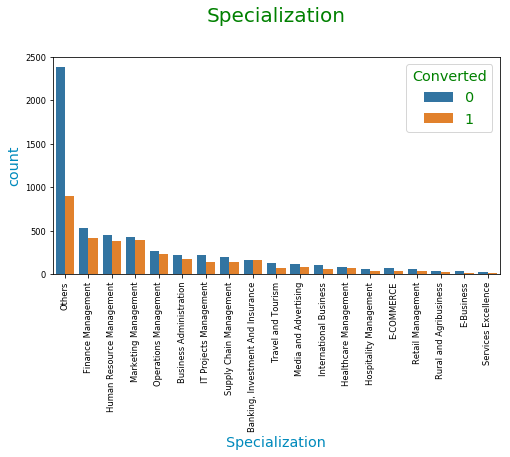

Others 27.45
Finance Management 44.0
Marketing Management 48.24
Human Resource Management 45.4
Operations Management 46.89
Business Administration 43.86
Banking, Investment And Insurance 48.96
Supply Chain Management 42.77
IT Projects Management 38.25
Media and Advertising 41.58
Healthcare Management 48.72
Travel and Tourism 35.15
International Business 35.23
Hospitality Management 40.54
E-COMMERCE 35.14
Retail Management 34.0
Rural and Agribusiness 42.47
E-Business 36.84
Services Excellence 27.5


In [124]:
var_ana('Specialization')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li><b>Finance,HR and Banking sectors</b> seems to be a major contributor </li>
        We should focus more on sectors with high conversion rate and highlight the content specific to the fields
    </span>
</div>

___

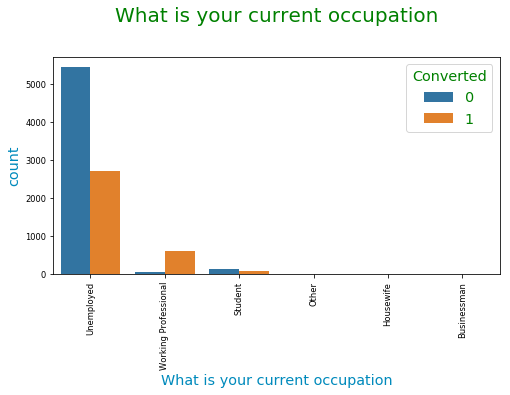

Unemployed 33.29
Working Professional 91.88
Student 35.92
Other 60.0
Housewife 100.0
Businessman 62.5


In [125]:
var_ana('What is your current occupation')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li><b>Unemployed people</b> have a conversion rate of 30%, with a huge lead count. </li>
            <li><b>Working Professionals</b> have 92% conversion rate with lesser leadcount</li>
        </ul>
        We should focus more on improving the conversion rate of <b>Unemployed persons</b>, by offering some discounts and try to increse the lead count of <b>working professionals</b>.
    </span>
</div>

___

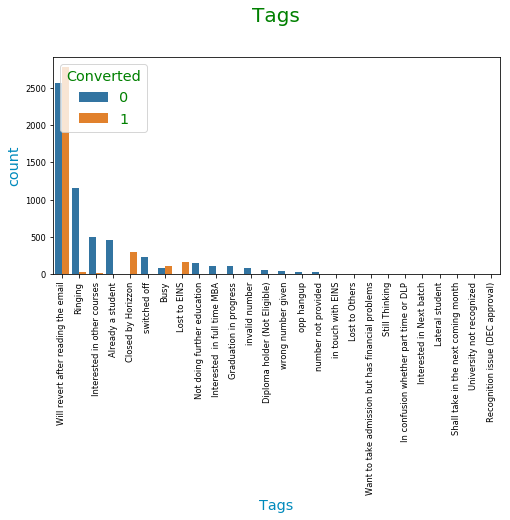

Will revert after reading the email 51.97
Closed by Horizzon 99.34
Lost to EINS 97.67
Busy 56.76
Ringing 2.86
Interested in other courses 2.55
Graduation in progress 6.31
Interested in Next batch 100.0
switched off 1.67
Interested  in full time MBA 2.59
in touch with EINS 25.0
Lateral student 100.0
Already a student 0.65
opp hangup 9.09
Want to take admission but has financial problems 33.33
Diploma holder (Not Eligible) 1.59
Shall take in the next coming month 50.0
Not doing further education 0.69
In confusion whether part time or DLP 20.0
invalid number 1.2
Still Thinking 16.67


In [126]:
var_ana('Tags')

In [127]:
## Categorize smaller segments to one
leads_df['Tags']=leads_df['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given',
'opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems',
'Still Thinking','In confusion whether part time or DLP','Interested in Next batch','Lateral student','University not recognized',
'Shall take in the next coming month','Recognition issue (DEC approval)'], 'Other_Tag')

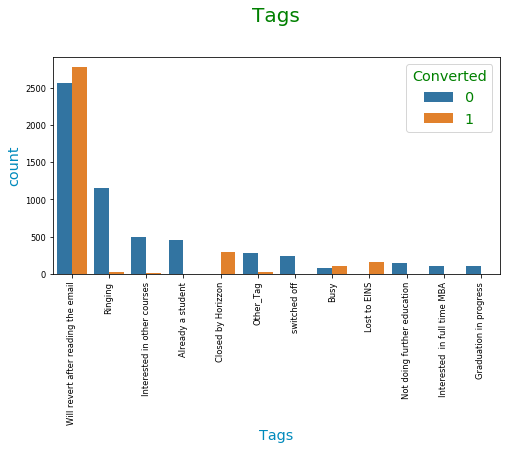

Will revert after reading the email 51.97
Closed by Horizzon 99.34
Lost to EINS 97.67
Busy 56.76
Ringing 2.86
Other_Tag 7.0
Interested in other courses 2.55
Graduation in progress 6.31
switched off 1.67
Interested  in full time MBA 2.59
Already a student 0.65
Not doing further education 0.69


In [128]:
## Recheck Tag
var_ana('Tags')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li><b>Will revert after reading the email</b> has a conversion rate of 51%, with a huge lead count. </li>
            <li><b>Closed by Horizzon & Lost to EINS</b> have 97-99% conversion rate with lesser leadcount</li>
        </ul>
        We should focus more on improving the conversion rate of <b>Will revert after reading the email</b>, by calling them frequently and updating them and try to increse the lead count of <b>Closed by Horizzon & Lost to EINS</b>.
    </span>
</div>

___

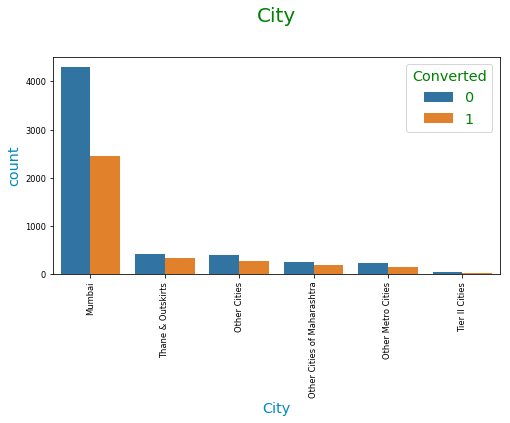

Mumbai 36.37
Thane & Outskirts 44.56
Other Cities 40.0
Other Cities of Maharashtra 43.95
Other Metro Cities 40.85
Tier II Cities 33.78


In [129]:
var_ana('City')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li><b>Mumbai, Thane and Outskirts</b> have a conversion rate of 36-44% with a huge lead count. </li>
            <li><b>Other Metro Cities</b> have 40% conversion rate with lesser leadcount</li>
        </ul>
        We should focus more on improving the conversion rate of <b>Mumbai leads</b>, by calling them frequently and updating them and try to increse the lead count of <b>Other Metro Cities</b>.
    </span>
</div>

___

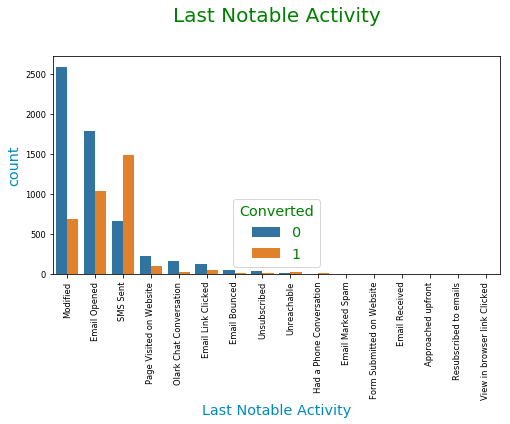

SMS Sent 69.19
Email Opened 36.91
Modified 20.81
Page Visited on Website 29.25
Email Link Clicked 26.01
Olark Chat Conversation 13.66
Unreachable 68.75
Had a Phone Conversation 92.86
Unsubscribed 26.67
Email Bounced 15.0
Email Marked Spam 100.0
Email Received 100.0
Approached upfront 100.0
Resubscribed to emails 100.0


In [130]:
var_ana('Last Notable Activity')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li><b>SMS Sent</b> has a conversion rate of 69%, with considerable lead count. </li>
            <li>Email Opened has 36% conversion rate with a large count of leads</li>
        </ul>
        We should focus more on improving the conversion rate of <b>SMS & Email Opened and Modified leads</b>
    </span>
</div>

___

> #### <font color='#008abc'>Numerical variables</font>

In [131]:
leads_df.select_dtypes(['int64','float64']).apply(lambda x: x.describe())

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


>####  Outlier checks

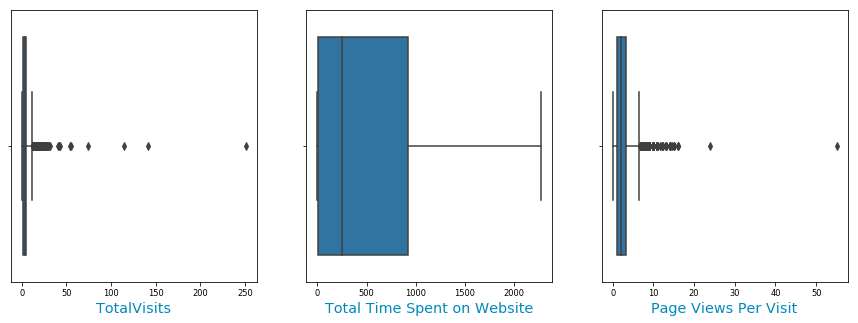

In [132]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(leads_df['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(leads_df['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(leads_df['Page Views Per Visit'])

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li>Outliers are found for <b>TotalVisits</b> and <b>Page Views Per Visit</b>. Let's handle them and recheck the distribution</li>
    </span>
</div>

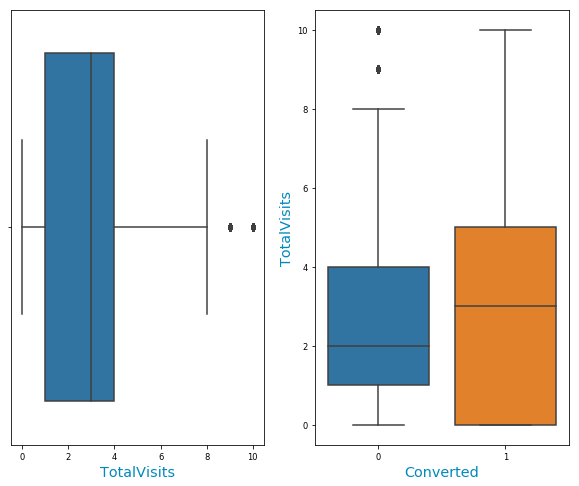

In [133]:
## Cap the outliers between first and third quartile
Q1 = leads_df['TotalVisits'].quantile(0.05)
Q3 = leads_df['TotalVisits'].quantile(0.95)
out_df = leads_df[(leads_df['TotalVisits'] >= Q1) & (leads_df['TotalVisits'] <= Q3)]
## Plot the resultant data
plt.subplot(1,2,1)
sns.boxplot(out_df['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(y=out_df['TotalVisits'],x=out_df['Converted'])

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li>The mean for Converted seems to be higher, incresing number of visits have higher chances of getting converted.</li>
    </span>
</div>

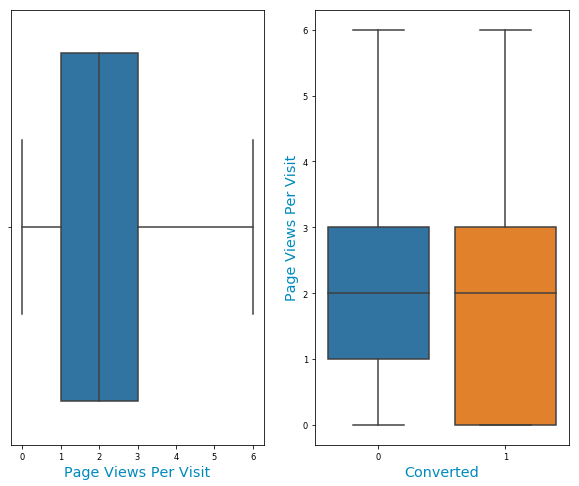

In [134]:
## Cap the outliers between first and third quartile
Q1 = leads_df['Page Views Per Visit'].quantile(0.05)
Q3 = leads_df['Page Views Per Visit'].quantile(0.95)
pout_df = leads_df[(leads_df['Page Views Per Visit'] >= Q1) & (leads_df['Page Views Per Visit'] <= Q3)]
## Plot the resultant data
plt.subplot(1,2,1)
sns.boxplot(pout_df['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(y=pout_df['Page Views Per Visit'],x=pout_df['Converted'])

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li>The mean for Converted and Not-Converted seems to be same.Not much can be inferred from page views.</li>
    </span>
</div>

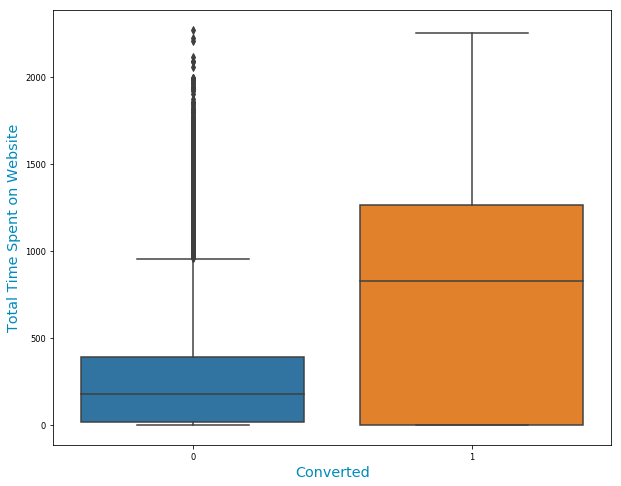

In [135]:
sns.boxplot(y=leads_df['Total Time Spent on Website'],x=leads_df['Converted'])

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li>The mean for Converted seems to be much higher,<b>leads spending more time on the website</b> have higher chances of getting converted.</li>
    </span>
</div>

> #### <font color='#008abc'>Categorical variables- with less than 3 categories</font>

In [136]:
## Fetch columns having more than 2 categories
leads_df[categorical_col[categorical_col<=3].index].describe()

,Do Not Email,Do Not Call,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,2,2,3,2,1,2,2,2,2,2,1,1,1,1,2
top,No,No,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
freq,8358,9072,9072,9060,9074,9072,9073,9073,9070,9067,9074,9074,9074,9074,6186


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> 
        <ul>
            <li>Most of the categories except <b>A free copy of Mastering The Interview</b>have No as the top contributor and hence no inference can be made from these columns.</li>
    </span>
</div>

___

In [137]:
## Lets drop columns that have minimal to no impact based on our analysis
original_df=leads_df.copy()
leads_df = leads_df.drop(['Lead Number','Country','What matters most to you in choosing a course','Search','Magazine',
                          'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                          'Through Recommendations','Receive More Updates About Our Courses',
                          'Update me on Supply Chain Content','Get updates on DM Content',
                          'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Do Not Call','Do Not Email'],axis=1)

In [138]:
leads_df.shape

(9074, 13)

> #### <font color='#008abc'>Create Dummy variables</font>

In [139]:
## One hot encoding
dummy_vars = pd.get_dummies(leads_df[['Lead Origin','Lead Source','Last Activity','Specialization',
                                      'What is your current occupation','Tags','City',
                                      'Last Notable Activity']], drop_first=True)
dummy_vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_sites,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [140]:
leads_df = pd.concat([leads_df, dummy_vars], axis=1)
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                          'What is your current occupation','Tags','City','Last Notable Activity'], axis = 1)
leads_df.shape

(9074, 80)

## <font color='#008abc'>Splitting Data into Training and Testing Sets</font>

In [141]:
leads_sig = leads_df.copy()
leads_sig.drop(['Prospect ID'], axis=1,inplace=True)

In [142]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(leads_sig, train_size = 0.7, test_size = 0.3, random_state = 100)

In [143]:
## Rescaling the features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns with categorical data, as we have to provide numerical data for model building
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [145]:
df_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0.007968,0.178347,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0,0.007968,0.085355,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4750,1,0.007968,0.619946,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,1,0.019920,0.711590,0.104167,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [146]:
df_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.385136,0.013831,0.217585,0.099046,0.535979,0.068651,0.003779,0.003936,0.320737,0.186427,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.486666,0.020602,0.244868,0.087462,0.498743,0.252879,0.061362,0.062622,0.466797,0.389482,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.003984,0.004492,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.011952,0.110961,0.083333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.019920,0.413522,0.138750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color='#008abc'>Model Building</font>

In [147]:
## Divide into X and Y set for model building

y_train = df_train.pop('Converted')
X_train = df_train

In [148]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ## Logistic regression model
# logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
# logm1.fit().summary()
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

## Logistic regression model
logreg = LogisticRegression()

## Run RFE to get important features
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [149]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', False, 18),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Other_sites', False, 63),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 64),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', False, 60),
 ('Last Activity_Form Submitted on Website', False, 47),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Other Actions', True, 1),
 ('Last Activity_Page Visited on Website', False, 55),
 ('Last Activity_SMS Sent', False, 7),
 ('Last Activity_Unreachable', False, 9),
 ('L

In [150]:
 X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Other Actions',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### <font color='#008abc'>Building model using statsmodel, for the detailed statistics</font>

In [151]:
# Creating X_train dataframe with RFE selected variables
col=X_train.columns[rfe.support_]
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [152]:
X_train_rfe.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Other Actions,Specialization_Others,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
3009,0.178347,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1012,0.085355,1,0,0,1,0,1,0,0,0,0,0,1,0,0
9226,0.000000,0,0,0,0,0,1,1,0,0,0,1,0,0,0
4750,0.619946,1,0,0,0,0,0,1,0,0,0,0,1,0,1
7987,0.711590,1,0,0,0,0,0,1,0,0,1,0,0,0,0


### <font color='#008abc'>Functions for model evaluation</font>

In [153]:
def build_model(y_train,X_rfe):
    X_rfe = sm.add_constant(X_rfe)
    lm = sm.GLM(y_train,X_rfe, family = sm.families.Binomial())
    model = lm.fit()
    print(model.summary())
    return X_rfe
    

In [154]:
## Compute VIF
def compute_VIF(X):
    vif = pd.DataFrame()
    X = X_train_model
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### <font color='#008abc'>MODEL 1:</font>

In [155]:
X_train_model1 = build_model(y_train,X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1706.5
Date:                Mon, 26 Aug 2019   Deviance:                       3413.0
Time:                        21:57:03   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.8238      0.275   

> <div class="alert alert-block alert-info">
    <span style="color:black">`Tags_switched off` is insignificant as it has a p-value of `0.09` which is higher than the acceptable value of `0.05`.Let's drop that column.
    </span>
</div>

In [156]:
col1=col.drop('Tags_switched off')
col1

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Other Actions',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### <font color='#008abc'>MODEL 2:</font>

In [157]:
X_train_model = build_model(y_train,X_train[col1])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1708.2
Date:                Mon, 26 Aug 2019   Deviance:                       3416.4
Time:                        21:57:16   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Covariance Type:             nonrobust
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.9262      0.275   

> <div class="alert alert-block alert-info">
    <span style="color:black">p values seem to be fine. Let's proceed with the model.
    </span>
</div>

> #### Checking VIFs

In [158]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

compute_VIF(X_train_model)

                                      Features    VIF
0                                        const  23.01
2          Lead Origin_Landing Page Submission   2.99
7                        Specialization_Others   2.88
3                    Lead Origin_Lead Add Form   1.85
13    Tags_Will revert after reading the email   1.68
12                                Tags_Ringing   1.48
4                 Lead Source_Welingak Website   1.38
10                     Tags_Closed by Horizzon   1.27
1                  Total Time Spent on Website   1.23
14              Last Notable Activity_SMS Sent   1.15
8   What is your current occupation_Unemployed   1.13
9                                    Tags_Busy   1.11
11                           Tags_Lost to EINS   1.09
5                  Last Activity_Email Bounced   1.03
6                  Last Activity_Other Actions   1.01


___

In [159]:
# Getting the predicted values on the train set
lm = sm.GLM(y_train,X_train_model, family = sm.families.Binomial())
model = lm.fit()
y_train_pred = model.predict(X_train_model)
y_train_pred[:10]

3009    0.240374
1012    0.050941
9226    0.000989
4750    0.970899
7987    0.996809
1281    0.939224
2880    0.128490
4971    0.991635
7536    0.872345
1248    0.016915
dtype: float64

In [160]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.40374224e-01, 5.09407162e-02, 9.89049035e-04, 9.70898671e-01,
       9.96808761e-01, 9.39224109e-01, 1.28490016e-01, 9.91635081e-01,
       8.72344613e-01, 1.69146453e-02])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [161]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.240374,3009
1,0,0.050941,1012
2,0,0.000989,9226
3,1,0.970899,4750
4,1,0.996809,7987


> #### <font color='#008abc'>Creating new column 'predicted' with 1 if  Converted_Prob > 0.5 else 0 </font>

In [162]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.240374,3009,0
1,0,0.050941,1012,0
2,0,0.000989,9226,0
3,1,0.970899,4750,1
4,1,0.996809,7987,1


> ### <font color='#008abc'> Metrics check - Train dataset </font>

In [163]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3613  292]
 [ 380 2066]]


In [164]:
# Predicted       Not Converted    Converted
# Actual
# Not Converted        3613          292
# Converted            380          2066  

In [165]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

####  Accuracy

In [166]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.894189891355692


#### Sensitivity

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8446443172526574

#### Specificity

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.925224071702945

#### False- positive rate

In [169]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07477592829705505


In [170]:
# positive predictive value 
print (TP / float(TP+FP))

0.8761662425784563


In [171]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9048334585524668


> <div class="alert alert-block alert-info">
    <span style="color:black">The p-value and VIF's are as expected and we have got an <b>accuracy of 89%</b> which is good. The other metrics such as <b>Sensitivity (84%) and specificity(91%)</b> also seem to be good.
    </span>
</div>

___

> ###  <font color='#008abc'>Plotting the ROC Curve</font>

In [172]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [173]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

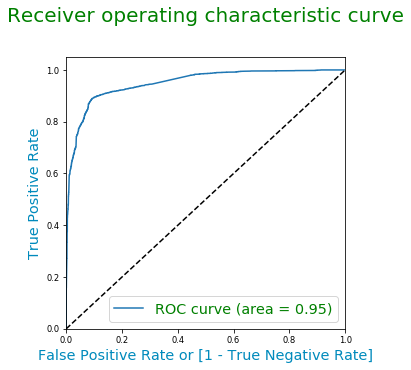

In [174]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the plot we can see that the <b>area under the curve (0.95) </b>is close to 1 </span>
</div>


> ### <font color='#008abc'> Finding Optimal Cutoff Point</font>
Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [175]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.240374,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.050941,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000989,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.970899,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.996809,7987,1,1,1,1,1,1,1,1,1,1,1


In [176]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.709809  0.982829  0.538796
0.2   0.2  0.856558  0.919460  0.817157
0.3   0.3  0.895135  0.895748  0.894750
0.4   0.4  0.900331  0.881030  0.912420
0.5   0.5  0.894190  0.844644  0.925224
0.6   0.6  0.887104  0.803352  0.939565
0.7   0.7  0.878602  0.745298  0.962100
0.8   0.8  0.849473  0.639411  0.981050
0.9   0.9  0.826799  0.566639  0.989757


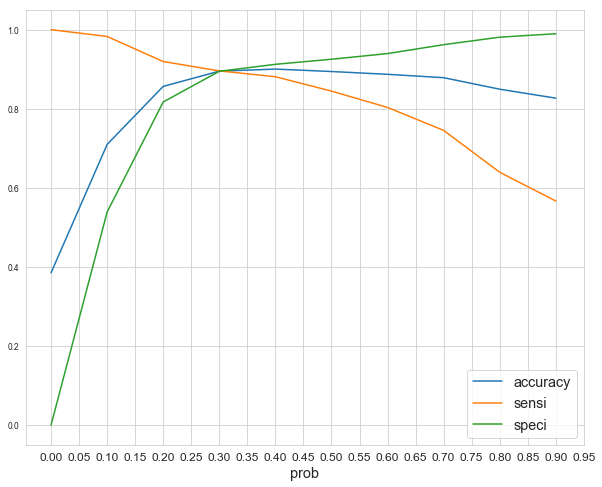

In [177]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.show()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> From the curve above,<b>0.3</b> is the optimum point to take it as a cutoff probability.</span>
</div>


In [178]:
## Final predicted flag
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.240374,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.050941,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000989,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.970899,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.996809,7987,1,1,1,1,1,1,1,1,1,1,1,1


####  Accuracy

In [179]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8951346244685876

In [180]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3494,  411],
       [ 255, 2191]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
acc = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy:",acc)
speci= TN/(TN+FP)
print("Specificity:",speci)
sens=TP/float(TP+FN)
print("Sensitivity:",sens)

Accuracy: 0.8951346244685876
Specificity: 0.8947503201024328
Sensitivity: 0.8957481602616517


In [183]:
# Calculate false postive rate - predicting churn when customer does not have converted
print("false postive rate: ",FP/ float(TN+FP))
# Positive predictive value 
print ("Positive predictive value: ",TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value: ", TN / float(TN+ FN))

false postive rate:  0.10524967989756723
Positive predictive value:  0.8420445810914681
Negative predictive value:  0.9319818618298212


> ### <font color='#008abc'>Precision and Recall</font>

In [184]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3613,  292],
       [ 380, 2066]], dtype=int64)

In [185]:
from sklearn.metrics import precision_score, recall_score
## Precision
precision=precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
precision

0.8761662425784563

In [186]:
## Recall
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
recall

0.8446443172526574

> ### <font color='#008abc'>Precision and recall tradeoff</font>

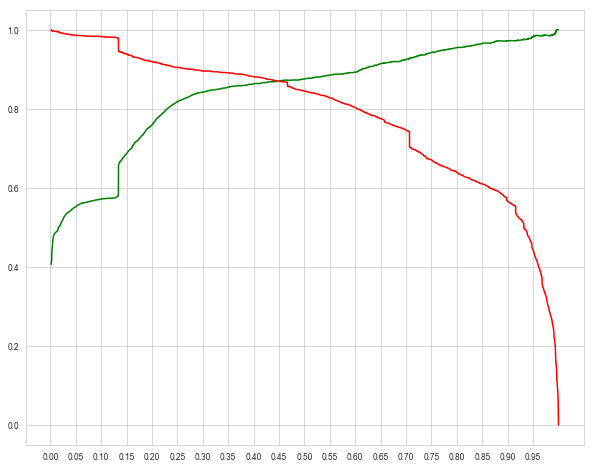

In [187]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Plot the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the precision-recall graph above, we get the `optimal threshold value as close to 0.43`. 
    However our business requirement here is to have Lead Conversion Rate around 80%. This is already achieved with our earlier `threshold value of 0.3`.
    So we will stick to this value </span>
</div>

In [188]:
## F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8601165695253956

> ### <font color='#008abc'>Making predictions on the test set</font>

In [189]:
## Scaling the dataset
df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [190]:
X_test = df_test[col1]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Other Actions,Specialization_Others,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
3271,0.070530,0,0,0,0,0,1,1,0,0,0,0,1,0
1490,0.679695,1,0,0,0,0,0,0,0,0,0,0,1,0
7936,0.033243,0,0,0,0,0,1,1,0,0,0,0,1,0
4216,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0
3830,0.073675,1,0,0,0,0,0,1,0,0,0,0,1,0


In [191]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = model.predict(X_test_sm)
y_test_pred[:10]

3271    0.173207
1490    0.965291
7936    0.151310
4216    0.999904
3830    0.167502
1800    0.630132
6507    0.018463
4821    0.009056
4223    0.967722
4714    0.133753
dtype: float64

In [192]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3271,0.173207
1490,0.965291
7936,0.151310
4216,0.999904
3830,0.167502


In [193]:
# Converting y_test to dataframe
y_test = df_test.pop('Converted')
y_test_df = pd.DataFrame(y_test)

In [194]:
# Putting Prospect_ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [195]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [196]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.173207
1,1,1490,0.965291
2,0,7936,0.151310
3,1,4216,0.999904
4,0,3830,0.167502


In [197]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.173207
1,1490,1,0.965291
2,7936,0,0.151310
3,4216,1,0.999904
4,3830,0,0.167502


In [198]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.173207,0
1,1490,1,0.965291,1
2,7936,0,0.151310,0
3,4216,1,0.999904,1
4,3830,0,0.167502,0


> #### Accuracy

In [199]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8894601542416453

In [200]:
## Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1544,  190],
       [ 111,  878]], dtype=int64)

In [201]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

> #### Sensitivity and Specificity

In [202]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity',TP / float(TP+FN))
# Let us calculate specificity
print('Specificity',TN / float(TN+FP))

Sensitivity 0.8877654196157735
Specificity 0.8904267589388697


In [203]:
# Calculate false postive rate - predicting churn when customer does not have converted
print("False postive rate: ",FP/ float(TN+FP))
# Positive predictive value 
print ("Positive predictive value: ",TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value: ", TN / float(TN+ FN))

False postive rate:  0.10957324106113034
Positive predictive value:  0.8220973782771536
Negative predictive value:  0.9329305135951662


In [207]:
from sklearn.metrics import precision_score, recall_score
## Precision
precision=precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
precision

0.8220973782771536

In [208]:
## Recall
recall=recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
recall

0.8877654196157735

In [223]:
## F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8536703937773457

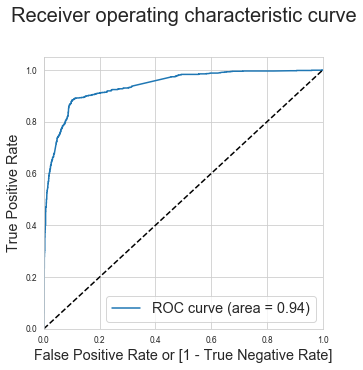

In [209]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the plot we can see that the <b>area under the curve (0.94) </b>is close to 1 </span>
</div>

> ### <font color='#008abc'>Lead Score calculation</font>

In [210]:
## Test final dataset
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.173207,0
1,1490,1,0.965291,1
2,7936,0,0.151310,0
3,4216,1,0.999904,1
4,3830,0,0.167502,0


In [211]:
## Train final dataset
leads_train_pred = y_train_pred_final.copy()
leads_train_pred = leads_train_pred[['Prospect ID','Converted','Converted_Prob','final_predicted']]
leads_train_pred.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3009,0,0.240374,0
1,1012,0,0.050941,0
2,9226,0,0.000989,0
3,4750,1,0.970899,1
4,7987,1,0.996809,1


In [212]:
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3009,0,0.240374,0
1,1012,0,0.050941,0
2,9226,0,0.000989,0
3,4750,1,0.970899,1
4,7987,1,0.996809,1


In [213]:
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)
print(lead_full_pred['Prospect ID'].nunique())


(6351, 4)
(2723, 4)
(9074, 4)
9074


In [214]:
## Lead Score calculation
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3009,0,0.240374,0,24
1,1012,0,0.050941,0,5
2,9226,0,0.000989,0,0
3,4750,1,0.970899,1,97
4,7987,1,0.996809,1,100


In [215]:
## Map Lead Number 
lead_full_pred = lead_full_pred.set_index('Prospect ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_Prob,final_predicted,Lead_Score
Prospect ID,,,,
0,0,0.002556,0,0
1,0,0.003655,0,0
2,1,0.966507,1,97
3,0,0.001694,0,0
4,1,0.293132,0,29


In [216]:
original_leads = original_df[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [217]:
## Combine based on index
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
Prospect ID,,,,,
0,660737,0,0.002556,0,0
1,660728,0,0.003655,0,0
2,660727,1,0.966507,1,97
3,660719,0,0.001694,0,0
4,660681,1,0.293132,0,29
5,660680,0,0.133753,0,13
6,660673,1,0.779884,1,78
7,660664,0,0.133753,0,13
8,660624,0,0.143789,0,14


In [218]:
2274/9074

0.25060612739695837

In [219]:
leads_with_score.shape
leads_with_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 5 columns):
Lead Number        9074 non-null int64
Converted          9074 non-null int64
Converted_Prob     9074 non-null float64
final_predicted    9074 non-null int64
Lead_Score         9074 non-null int64
dtypes: float64(1), int64(4)
memory usage: 425.3 KB


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> From the above counts and info,we find that there are no null values.
        <b>leads_with_score</b> is the final datatset with lead_scores and predicted information</span>
</div>

> #### <font color='#008abc'>Coefficient Analysis</font>

In [220]:
pd.options.display.float_format = '{:.2f}'.format
new_params = model.params[1:]
new_params.sort_values(ascending=False)

Tags_Lost to EINS                             8.69
Tags_Closed by Horizzon                       8.66
Total Time Spent on Website                   4.33
Tags_Will revert after reading the email      4.10
Tags_Busy                                     3.30
Last Notable Activity_SMS Sent                2.75
Lead Origin_Lead Add Form                     2.52
Lead Source_Welingak Website                  2.24
Last Activity_Other Actions                   1.91
Tags_Ringing                                 -0.95
Specialization_Others                        -1.73
Lead Origin_Landing Page Submission          -1.79
Last Activity_Email Bounced                  -1.95
What is your current occupation_Unemployed   -2.31
dtype: float64

> #### <font color='#008abc'> Relative Coefficient </font>

In [221]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending=False)

Tags_Lost to EINS                            100.00
Tags_Closed by Horizzon                       99.68
Total Time Spent on Website                   49.80
Tags_Will revert after reading the email      47.18
Tags_Busy                                     38.03
Last Notable Activity_SMS Sent                31.63
Lead Origin_Lead Add Form                     29.02
Lead Source_Welingak Website                  25.83
Last Activity_Other Actions                   21.96
Tags_Ringing                                 -10.95
Specialization_Others                        -19.95
Lead Origin_Landing Page Submission          -20.57
Last Activity_Email Bounced                  -22.40
What is your current occupation_Unemployed   -26.56
dtype: float64

> ### <font color='#008abc'>Relative coefficient plot</font>

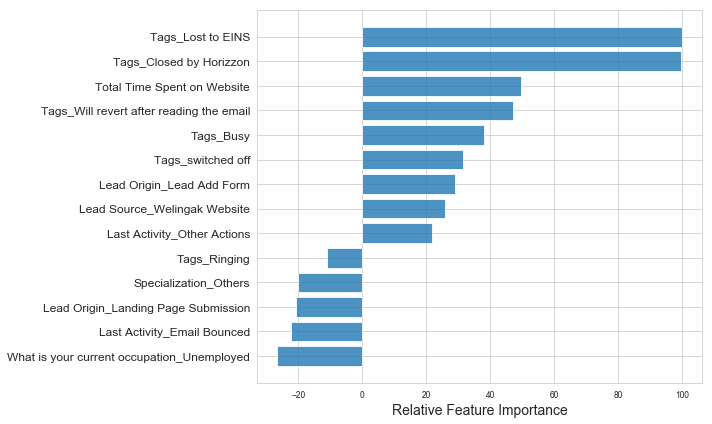

In [222]:
## Sort fetaures for positive and negative axes
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show() 

#### Top 3 variables

In [1637]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
10,Tags_Lost to EINS,100.00
9,Tags_Closed by Horizzon,99.68
0,Total Time Spent on Website,49.80
